# §2.6: Introduction to the Basic Mathematical Tools Used in Digital Processing
[< Chapter 2: Digital Image Fundamentals](./README.md)

This section has two primary objectives:
1. To introduce various mathematical tools used throughout the book.
2. Develop an intuition for how/why each of these methods are used in image processing.

### Subsections:
* [§2.6.1: Element-wise Versus Matrix Operations](#261-element-wise-versus-matrix-operations)
* [§2.6.2: Linear Versus Non-linear Operations](#262-linear-versus-non-linear-operations)
* [§2.6.3: Arithmetic Operations](#263-arithmetic-operations)
* [§2.6.4: Set and Logical Operations](#264-set-and-logical-operations)
    * [§2.6.4.1: Basic Set Operations](#2641-basic-set-operations)
    * [§2.6.4.2: Logical Operations](#2642-logical-operations)
* [§2.6.5: Spatial Operations](#265-spatial-operations)
    * [§2.6.5.1: Single-Pixel Operations](#2651-single-pixel-operations)
    * [§2.6.5.2: Neighborhood Operations](#2652-neighborhood-operations)
    * [§2.6.5.3: Geometric Transformations](#2653-geometric-transformations)
    * [§2.6.5.4: Image Registration](#2654-image-registration)
* [§2.6.6: Vector and Matrix Operations](#266-vector-and-matrix-operations)
* [§2.6.7: Image Transforms](#267-image-transforms)
* [§2.6.8: Image Intensities as Random Variables](#268-image-intensities-as-random-variables)

## §2.6.1: Element-wise Versus Matrix Operations

## §2.6.2: Linear Versus Non-linear Operations

## §2.6.3: Arithmetic Operations

## §2.6.4: Set and Logical Operations

### §2.6.4.1: Basic Set Operations

### §2.6.4.2: Logical Operations

## §2.6.5: Spatial Operations

### §2.6.5.1: Single-Pixel Operations

### §2.6.5.2: Neighborhood Operations

### §2.6.5.3: Geometric Transformations

Geometric transformations of digital images consist of two basic operations:
1. Spatial transformation of coordinates
2. Intensity interpolation that assigns intensity values to the spatially transformed pixels

The transformation of coordinates may be expressed as:

$$
\begin{bmatrix}
x' \\
y'
\end{bmatrix} = T\begin{bmatrix}
x \\
y
\end{bmatrix} = \begin{bmatrix}
t_{11} t_{12} \\
t_{21} t_{22}
\end{bmatrix} \begin{bmatrix}
x \\
y
\end{bmatrix}
$$

where $(x, y)$ are pixel coordinates in the original image, and $(x', y')$ are the corresponding pixel coordinates of the transformed image.

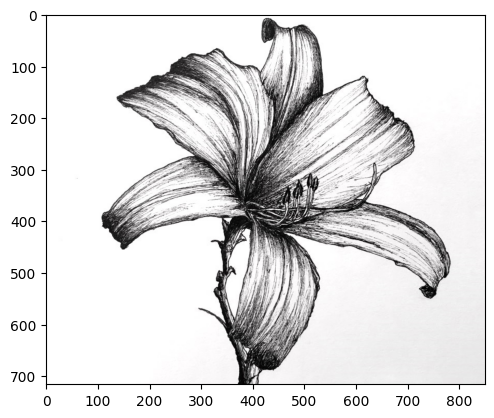

In [16]:
"""Load example image."""

from PIL                import Image, ImageFile
from matplotlib.pyplot  import imshow
from numpy              import array

# Load image
image:  ImageFile = Image.open(fp = "./__images__/flower.jpg")

# Display image
imshow(image)


Applying identity transform to image.
Applying scale transform to image.
Applying translate transform to image.
Applying rotate transform to image.
Applying vertical shear transform to image.
Applying horizontal shear transform to image.


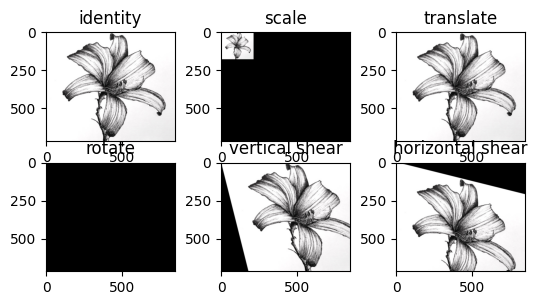

In [75]:
"""Apply transformations to image."""

from math               import cos, pi, sin

from matplotlib.pyplot  import imshow, subplot, subplots, title
from PIL                import Image, ImageFile

# Define transformations
transforms: dict =  {
    "identity":         ((1, 0, 0), (0, 1, 0), (0, 0, 1)),
    "scale":            ((.25, 0, 0), (0, .25, 0), (0, 0, 1)),
    "translate":        ((1, 0, 1.5), (0, 1, 1.5), (0, 0, 1)),
    "rotate":           ((cos(pi), -sin(pi), 0), (sin(pi), cos(pi), 0), (0, 0, 1)),
    "vertical shear":   ((1, .25, 0), (0, 1, 0), (0, 0, 1)),
    "horizontal shear": ((1, 0, 0), (.25, 1, 0), (0, 0, 1))
}

# Define transform method
def apply_transform(
    input_image:    ImageFile,
    transform:      array
) -> array:
    """# Apply transform to given image.

    ## Args:
        * input_image   (array):    Input image.
        * transform     (array):    Transform definition.

    ## Returns:
        * array:    Transformed image.
    """
    # Record height and width of input image
    width, height =         input_image.size
    
    # Initialize output image to which new pixel values can be mapped
    output_image:   Image = Image.new(mode = "RGB", size = (width, height))
    
    # Load pizel array for output image
    output_pixels:  array = output_image.load()
    
    # Extract 2x2 matrix and translation vector
    a, b, tx =              transform[0]
    c, d, ty =              transform[1]
    
    # Compute the inverse of the transformation matrix
    determinant:    float = a * d - b * c
    
    inv_a:          float = d / determinant
    inv_b:          float = -b / determinant
    inv_c:          float = -c / determinant
    inv_d:          float = a / determinant
    
    inv_tx:         float = -(inv_a * tx + inv_b * ty)
    inv_ty:         float = -(inv_c * tx + inv_d * ty)
    
    # For each row of image...
    for x in range(width):
        
        # For each pizel in row...
        for y in range(height):
            
            # Apply inverse transformation
            source_x:   float = inv_a * x + inv_b * y + inv_tx
            source_y:   float = inv_c * x + inv_d * y + inv_ty
            
            # If resulting pixel location does not fall outside of image...
            if 0 <= source_x < width and 0 <= source_y < height:
                
                # Assign new pixel in output image
                output_pixels[x, y] = bilinear_interpolation(input_image = input_image, x = source_x, y = source_y)
                
    # Return transformed image
    return output_image

# Define bilinear interpolation method
def bilinear_interpolation(
    input_image:    ImageFile,
    x:              float,
    y:              float
) -> tuple:
    """# Perform bilinear interpolation for non-linear pixel locations.

    ## Args:
        * input_image   (Image):    Input image.
        * x             (float):    X-axis coordinate.
        * y             (float):    Y-axis coordinate.

    ## Returns:
        * tuple:    New pixel values.
    """
    # Record height and width of input image
    width, height =         input_image.size
    
    # Convert coordinates to integer values
    x0, y0 =                int(x), int(y)
    x1, y1 =                min(x0 + 1, width - 1), min(y0 + 1, height - 1)
    
    # Get the surrounding pixel values
    Q11 = image.getpixel((x0, y0))
    Q21 = image.getpixel((x1, y0))
    Q12 = image.getpixel((x0, y1))
    Q22 = image.getpixel((x1, y1))
    
    # Compute interpolation weights
    dx, dy =                x - x0, y - y0
    R1:         tuple =     tuple((1 - dx) * q11 + dx * q21 for q11, q21 in zip(Q11, Q21))
    R2:         tuple =     tuple((1 - dx) * q12 + dx * q22 for q12, q22 in zip(Q12, Q22))
    P:          tuple =     tuple((1 - dy) * r1 + dy * r2 for r1, r2 in zip(R1, R2))
    
    # Return interpolated pixel
    return tuple(int(p) for p in P)
    
# Demonstrate transforms
for t, transform in enumerate(transforms, start = 1):
    
    # Communicate action
    print(f"Applying {transform} transform to image.")
    
    # Register subplot index
    subplot(330 + t)
    
    # Apply transform and plot image
    imshow(apply_transform(input_image = image, transform = transforms[transform]))
    
    # Place transform title
    title(transform)


### §2.6.5.4: Image Registration

## §2.6.6: Vector and Matrix Operations

## §2.6.7: Image Transforms

## §2.6.8: Image Intensities as Random Variables